<a href="https://colab.research.google.com/github/ISMAELSOUSAFONTELESCASTRO/notebook/blob/main/An%C3%A1lise_de_Risco_e_Probabilidade_de_Eventos_Extremos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [261]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.stats import genextreme
from google.colab import files
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [262]:
# Carregar os dados
filename = 'owid-covid-data.csv'
data = pd.read_csv(filename)

data['date'] = pd.to_datetime(data['date'])
# Substituindo valores nulos pela média das colunas numéricas
data = data.fillna(data.select_dtypes(include=['number']).mean())

# Normalizando os dados numéricos
scaler = MinMaxScaler()
numerical_data = data.select_dtypes(include=['number'])
normalized_numerical_data = pd.DataFrame(scaler.fit_transform(numerical_data), columns=numerical_data.columns)

# Codificando as colunas de string usando one-hot encoding
non_numerical_data = data.select_dtypes(exclude=['number'])
encoded_non_numerical_data = pd.get_dummies(non_numerical_data, drop_first=True)

# Concatenando os dados normalizados e os dados codificados
dataNormalized = pd.concat([normalized_numerical_data, encoded_non_numerical_data], axis=1)

print(dataNormalized.describe())
print(data.dtypes)

         total_cases      new_cases  new_cases_smoothed   total_deaths  \
count  103143.000000  103143.000000       103143.000000  103143.000000   
mean        0.005920       0.082032            0.014781       0.007367   
min         0.000000       0.000000            0.000000       0.000000   
25%         0.000008       0.075841            0.007485       0.000019   
50%         0.000092       0.075933            0.007618       0.000208   
75%         0.001092       0.076941            0.008931       0.004061   
max         1.000000       1.000000            1.000000       1.000000   
std         0.039572       0.037771            0.043869       0.040843   

          new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  103143.000000        103143.000000            103143.000000   
mean        0.103302             0.024297                 0.075149   
min         0.000000             0.000000                 0.000000   
25%         0.096006             0.015509            

In [263]:
media = dataNormalized['new_deaths'].mean()
mediana = dataNormalized['new_deaths'].median()
desvioPadrao = dataNormalized['new_deaths'].std()
maximo = dataNormalized['new_deaths'].max()
minimo = dataNormalized['new_deaths'].min()
print("Media", media)
print("Mediana", mediana)
print("Desvio Padrão", desvioPadrao)
print("Máximo", maximo)
print("Mínimo", minimo)

Media 0.10330197229229252
Mediana 0.09620582640904995
Desvio Padrão 0.03709074911437072
Máximo 1.0
Mínimo 0.0


In [264]:
print(dataNormalized.head())

   total_cases  new_cases  new_cases_smoothed  total_deaths  new_deaths  \
0          0.0   0.075839            0.014781      0.007367    0.103302   
1          0.0   0.075838            0.014781      0.007367    0.103302   
2          0.0   0.075838            0.014781      0.007367    0.103302   
3          0.0   0.075838            0.014781      0.007367    0.103302   
4          0.0   0.075838            0.014781      0.007367    0.103302   

   new_deaths_smoothed  total_cases_per_million  new_cases_per_million  \
0             0.024297             1.353342e-07               0.105319   
1             0.024297             1.353342e-07               0.105317   
2             0.024297             1.353342e-07               0.105317   
3             0.024297             1.353342e-07               0.105317   
4             0.024297             1.353342e-07               0.105317   

   new_cases_smoothed_per_million  total_deaths_per_million  ...  \
0                         0.08108   

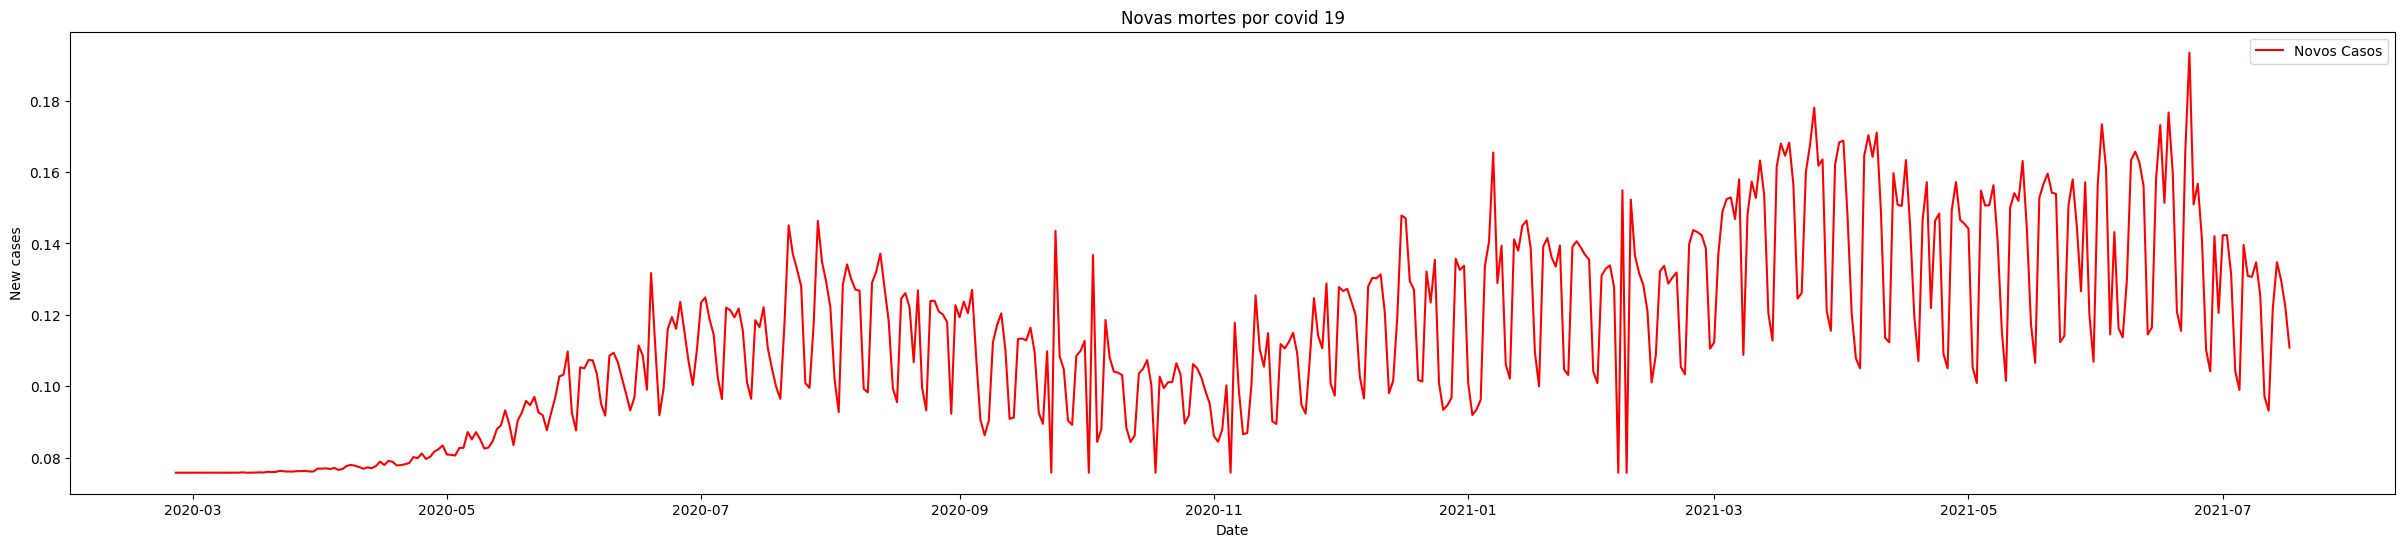

In [265]:
brazil_data = dataNormalized[dataNormalized['location_Brazil'] == True]
plt.figure(figsize=(30, 6))
plt.plot(brazil_data['date'], brazil_data['new_cases'], label = 'Novos Casos', color = 'red')
plt.xlabel('Date')
plt.ylabel('New cases')
plt.title('Novas mortes por covid 19')
plt.legend()
plt.show()

<ipython-input-266-71544eebf893>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brazil_data['date'] = pd.to_datetime(brazil_data['date'])


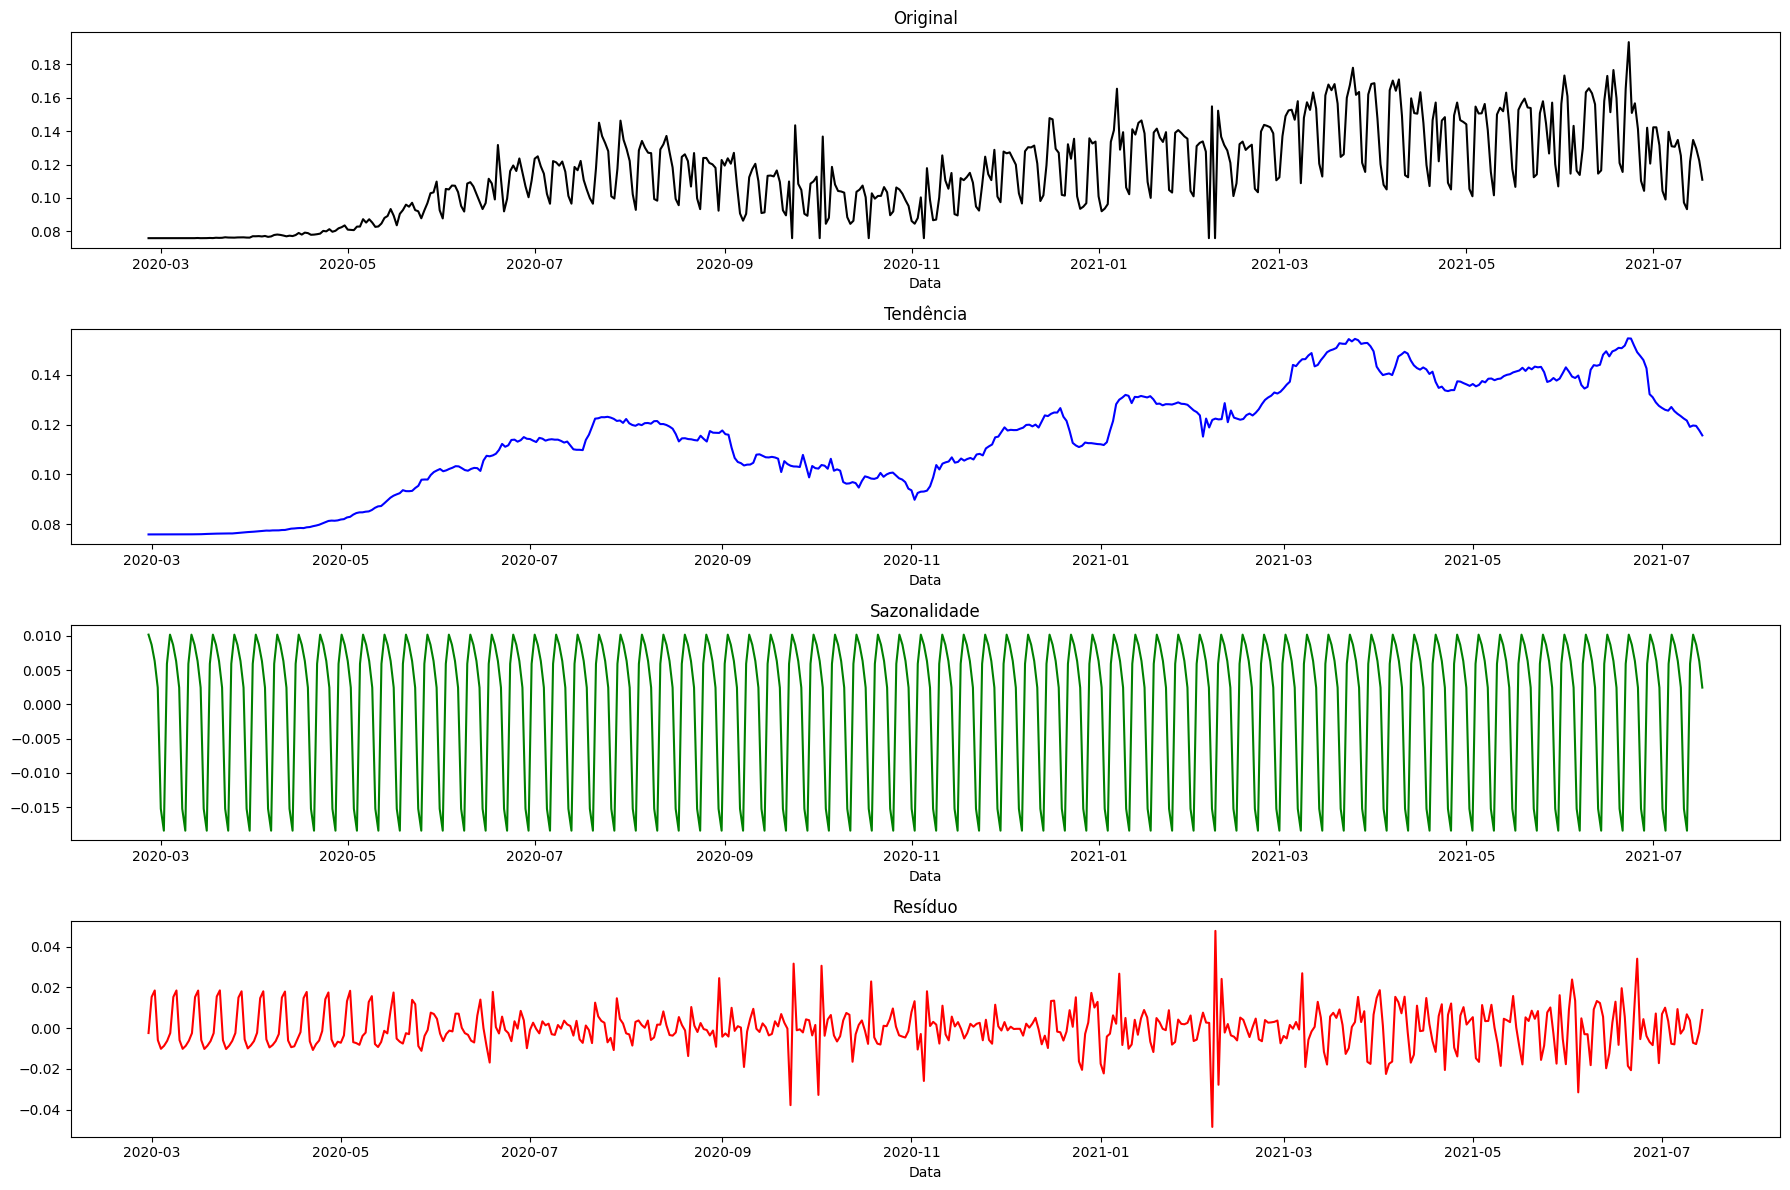

In [266]:


# Certifique-se de que a coluna 'date' está no formato datetime e definida como índice
brazil_data['date'] = pd.to_datetime(brazil_data['date'])
brazil_data.set_index('date', inplace=True)

# Decompor a série temporal
decomposition = seasonal_decompose(brazil_data['new_cases'], model='additive')  # ou model='multiplicative'

# Plotar os componentes
plt.figure(figsize=(18, 12))

plt.subplot(4, 1, 1)
plt.plot(decomposition.observed.index, brazil_data['new_cases'], label='Original', color='black')
plt.title('Original')
plt.xlabel('Data')

plt.subplot(4, 1, 2)
plt.plot(decomposition.trend.index, decomposition.trend, label='Tendência', color='blue')
plt.title('Tendência')
plt.xlabel('Data')

plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal.index, decomposition.seasonal, label='Sazonalidade', color='green')
plt.title('Sazonalidade')
plt.xlabel('Data')

plt.subplot(4, 1, 4)
plt.plot(decomposition.resid.index, decomposition.resid, label='Resíduo', color='red')
plt.title('Resíduo')
plt.xlabel('Data')

plt.tight_layout()
plt.show()

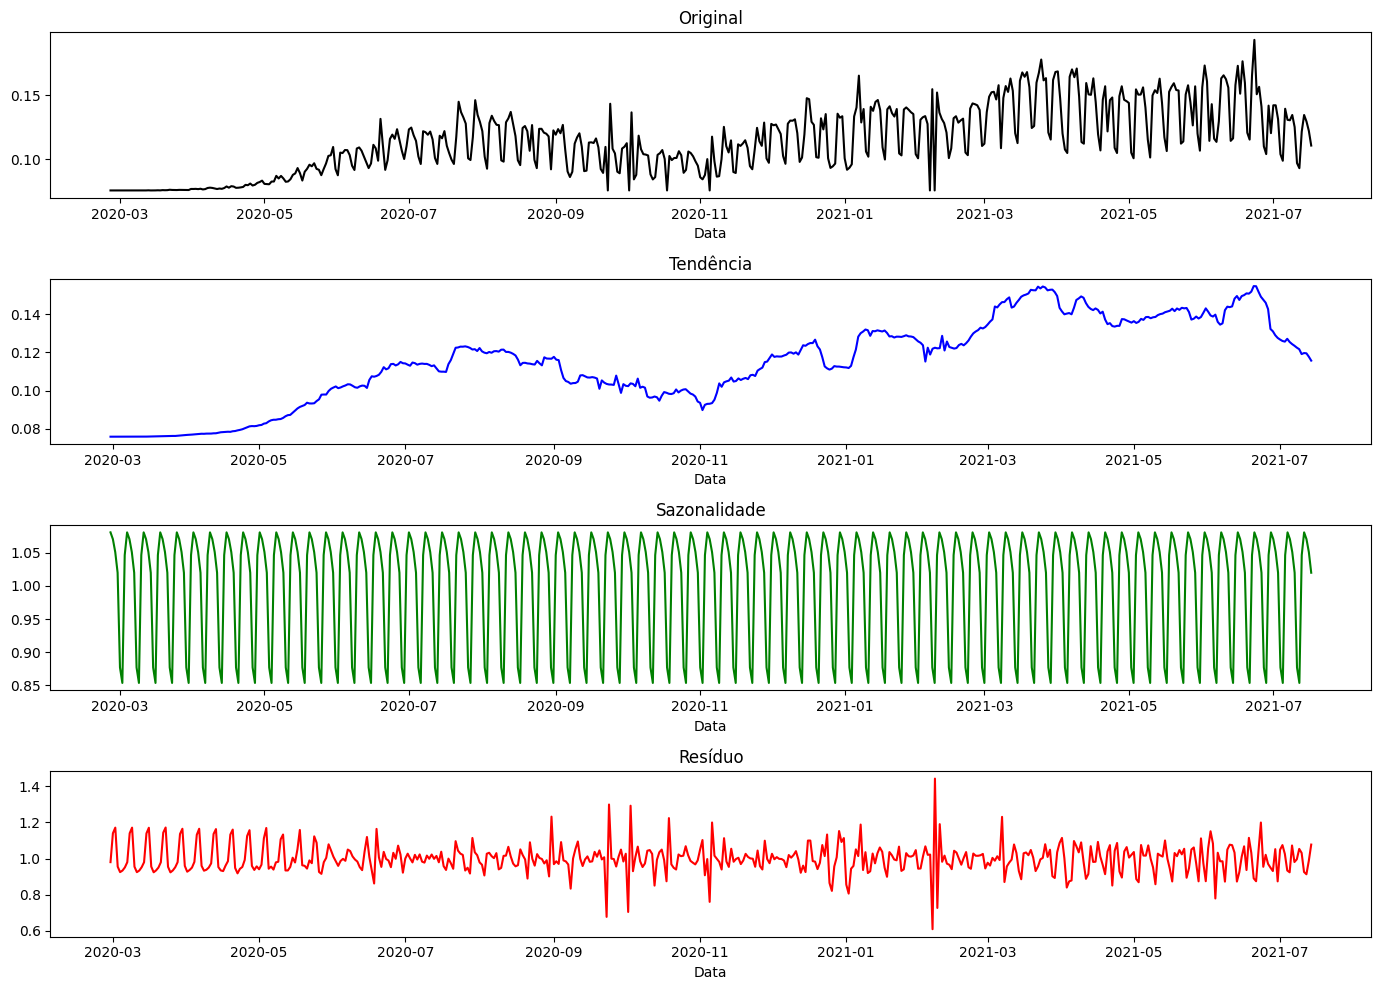

In [267]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Certifique-se de que a coluna 'date' está no formato datetime e definida como índice
#brazil_data['date'] = pd.to_datetime(brazil_data['date'])
#brazil_data.set_index('date', inplace=True)

# Decompor a série temporal
decomposition = seasonal_decompose(brazil_data['new_cases'], model='multiplicative')  # ou model='multiplicative'

# Plotar os componentes
plt.figure(figsize=(14, 10))

plt.subplot(4, 1, 1)
plt.plot(decomposition.observed.index, brazil_data['new_cases'], label='Original', color='black')
plt.title('Original')
plt.xlabel('Data')

plt.subplot(4, 1, 2)
plt.plot(decomposition.trend.index, decomposition.trend, label='Tendência', color='blue')
plt.title('Tendência')
plt.xlabel('Data')

plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal.index, decomposition.seasonal, label='Sazonalidade', color='green')
plt.title('Sazonalidade')
plt.xlabel('Data')

plt.subplot(4, 1, 4)
plt.plot(decomposition.resid.index, decomposition.resid, label='Resíduo', color='red')
plt.title('Resíduo')
plt.xlabel('Data')

plt.tight_layout()
plt.show()

<Figure size 2000x600 with 0 Axes>

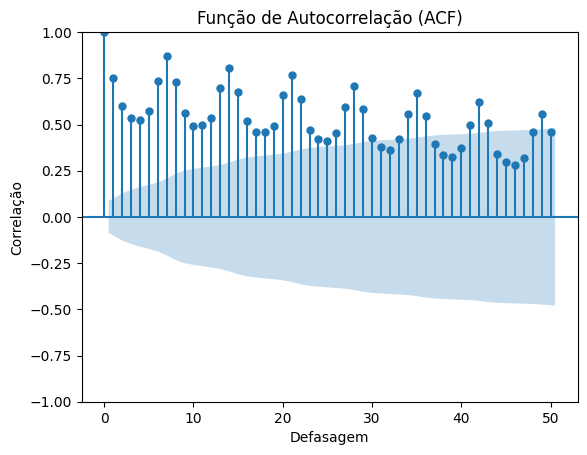

In [268]:
# Supondo que 'dados_mundo' seja o seu DataFrame e 'new_cases' seja a coluna de interesse
# Verificar e garantir que a série temporal não tenha valores ausentes

# Plotar ACF
plt.figure(figsize=(20, 6))
plot_acf(brazil_data['new_cases'], lags=50, alpha=0.05, use_vlines=True)
plt.title('Função de Autocorrelação (ACF)')
plt.xlabel('Defasagem')
plt.ylabel('Correlação')
plt.show()

<Figure size 1000x600 with 0 Axes>

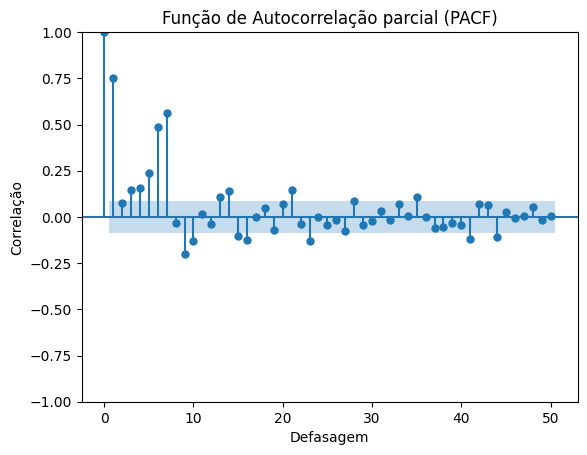

In [269]:
plt.figure(figsize=(10, 6))
plot_pacf(brazil_data['new_cases'], lags=50, alpha=0.05, use_vlines=True)
plt.title('Função de Autocorrelação parcial (PACF)')
plt.xlabel('Defasagem')
plt.ylabel('Correlação')
plt.show()

In [270]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(brazil_data['new_cases'].dropna())
print(f'p-value: {result[1]}')

p-value: 0.304171783709306


In [271]:
print(brazil_data['new_cases'].min())
print(brazil_data['new_cases'].max())

0.07583797458024767
0.19337678764510272


In [272]:
new_cases = brazil_data['new_cases']


params = genextreme.fit(new_cases)
c, loc, scale = params



# Definindo um limite para eventos extremos
threshold = new_cases.quantile(0.95)  # 95% dos casos

# Estimando a probabilidade de ocorrência de um evento extremo
probability_extreme = 1 - genextreme.cdf(threshold, c, loc=loc, scale=scale)
print(f"A probabilidade de ocorrência de novos casos extremos acima de {threshold:.2f} é {probability_extreme:.4f}.")


A probabilidade de ocorrência de novos casos extremos acima de 0.16 é 0.2222.


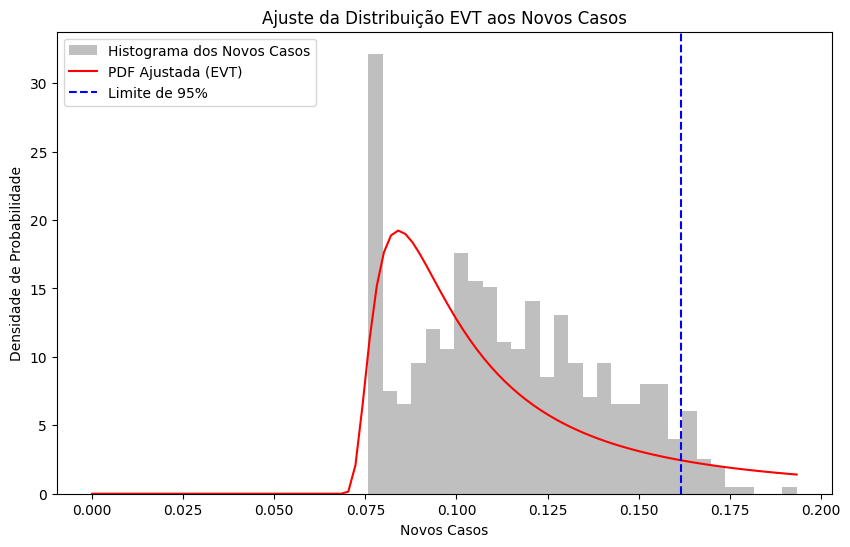

In [273]:
# Gerando valores para a distribuição ajustada
x = np.linspace(0, new_cases.max(), 100)
pdf_fitted = genextreme.pdf(x, c, loc=loc, scale=scale)

# Plotando a distribuição dos novos casos e a PDF ajustada
plt.figure(figsize=(10, 6))
plt.hist(new_cases, bins=30, density=True, alpha=0.5, color='gray', label='Histograma dos Novos Casos')
plt.plot(x, pdf_fitted, 'r-', label='PDF Ajustada (EVT)')
plt.axvline(threshold, color='blue', linestyle='--', label='Limite de 95%')
plt.title('Ajuste da Distribuição EVT aos Novos Casos')
plt.xlabel('Novos Casos')
plt.ylabel('Densidade de Probabilidade')
plt.legend()
plt.show()
